# 1. Аналитика

In [1]:
# вызов библиотеки Pandas
import pandas as pd
# импорт библиотеки numpy
import numpy as np
# Импорт библиотеки Seaborn для построения графиков
import seaborn as sns
# Вызов библиотеки для создания графиков
import matplotlib.pyplot as plt
# Импорт библиотеки scipy
from scipy import stats
# Импорт библиотеки scipy
from scipy import stats as st

In [2]:
# исследование данных
data1 = pd.read_csv('/datasets/query_1.csv')
data2 = pd.read_csv('/datasets/query_3.csv')

In [3]:
# просмотр 2-х таблиц с данными
print(data1)
print(data2)

                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185
               city  average_flights
0            Абакан         3.870968
1           Анадырь         1.000000
2             Анапа         2.161290
3       Архангельск         5.354839
4         Астрахань         2.451613
..              ...              ...
96             Чита         1.580645
97           Элиста         4.870968
98   Южно-Сахалинск         4.290323
99           Якутск         2.741935
100       Ярославль         1.322581

[101 rows x 2 columns]


In [4]:
# просмотр информации 2-х таблиц
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


In [5]:
# Подсчет пропущенных значений по 2-м таблицам
print(data1.isnull().sum())
print(data2.isnull().sum())

model             0
flights_amount    0
dtype: int64
city               0
average_flights    0
dtype: int64


#### Вывод
1. Таблицы data1 и data2 не содержат пропусков.
2. В таблице data1 - 8 записей.
3. В таблице data2 - 101 запись.
4. Все типы данных в таблице data1 корректны:
    + model (модель самолета) - текстовый тип поля. Изменений не требуется;
    + flights_amount (количество рейсов для каждой модели самолетов) - целочисленный тип поля. Изменений не требуется.
5. Все типы данных в таблице data2 корректны:    
    + city (город) - текстовый тип поля. Изменений не требуется;
    + average_flights (среднее количество рейсов, прибывающих в город) - число с плавающей точкой тип поля. Изменений не требуется (среднее количество может быть не целым значением).

count       8.000000
mean     2035.625000
std      1965.203947
min       300.000000
25%       605.250000
50%       795.000000
75%      4250.250000
max      4557.000000
Name: flights_amount, dtype: float64


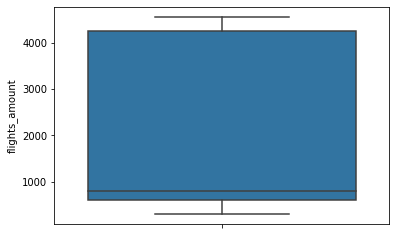

In [6]:
# Построим диаграмму размаха колонки flights_amount таблицы data1
sns.boxplot(y="flights_amount", data=data1)
# Изучим информацию колонки flights_amount таблицы data1
print(data1['flights_amount'].describe())

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64


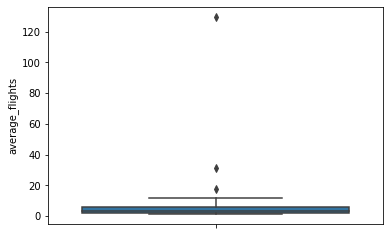

In [7]:
# # Построим диаграмму размаха колонки average_flights таблицы data2
sns.boxplot(y="average_flights", data=data2)
# Изучим информацию колонки average_flights таблицы data2
print(data2['average_flights'].describe())

#### Вывод
1. Колонка flights_amount таблицы data1 не содержит аномальные выборы значений.
2. В колонке flights_amount таблицы data1:
    + среднее значение равно - 2035.63;
    + медиана равна - 795.
3. Колонка average_flights таблицы data2 содержит аномальные выборы значений свыше значения 20.
4. В колонке average_flights таблицы data2:
    + среднее значение равно - 5;
    + медиана равна - 3.    

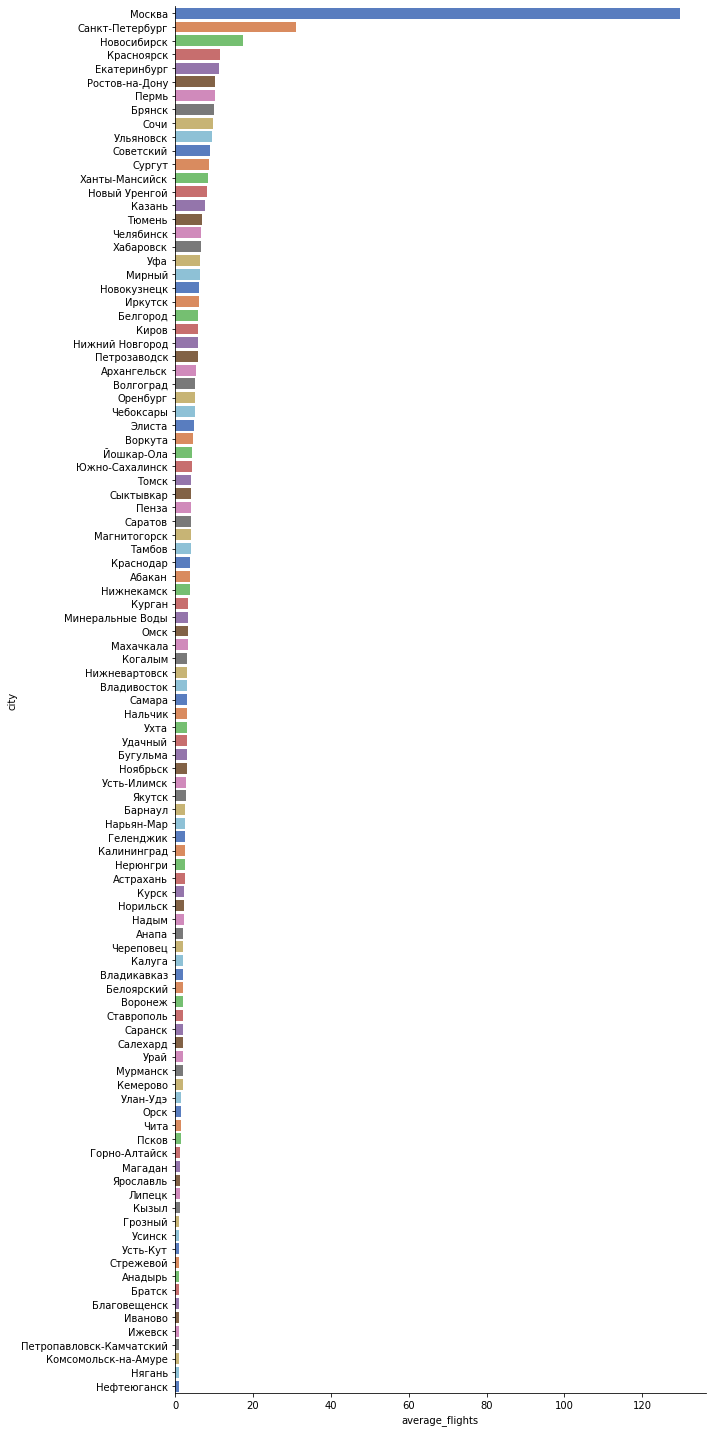

In [8]:
# График зависимости города и количества рейсов
sns.catplot(x="average_flights", 
            y="city", 
            data=data2.sort_values(by=['average_flights'], 
                                   ascending = False),
            height=20, 
            kind="bar", 
            palette="muted", 
            aspect=0.5)

#### Вывод
1. На первом месте стоит город Москва.
2. Произведем расчет топ-10 городов по количеству рейсов и построим график

In [9]:
# Расчет топ-10 городов по количеству рейсов
city_top = data2.sort_values(by=['average_flights'], ascending = False)
city_top10 = city_top.head(10)
city_top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


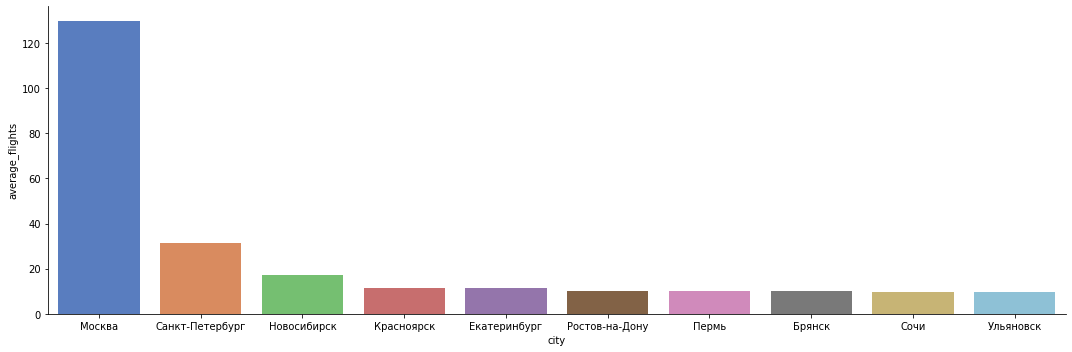

In [10]:
# График топ-10 городов
sns.catplot(x="city", y="average_flights"
                     , data=city_top10,
                height=5, kind="bar", palette="muted", aspect=3)

#### Вывод
1. Наибольшее среднее количество рейсов (содержащее в том числе "аномальные" выбросы значений) приодится на город Москва - 129.77. 
2.  В 10-ку городов, зависящих от количества рейсов входят крупнейшие города России.
3. Аномальные значения в колонке average_flights по городу Москва удалять не будем, так как Москва крупнейший в мире транспортный узел страны и "аномальные" выбросы вполне объяснимы.

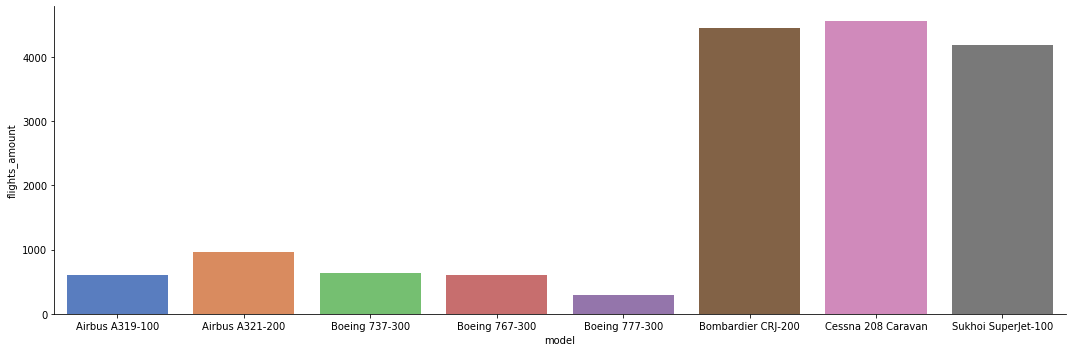

In [11]:
# График зависимости модели самолета и количества рейсов
sns.catplot(x="model", y="flights_amount"
                     , data=data1,
                height=5, kind="bar", palette="muted", aspect=3)

#### Вывод
Наибольшее количество рейсов приходится на следующие модели самолетов:
1. Bombardier CRJ-200 - 4446 рейсов.
2. Cessna 208 Caravan - 4557 рейсов.
3. Sukhoi SuperJet-100 - 4185 рейсов.

### Общий вывод анализа
1. Наибольшее количество рейсов осуществляется в крупнейшие города страны: Москва, Санкт-Петербург и т.д.
2. Наибольшее количество рейсов приходится на модели самолетов: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100

# 2. Проверка гипотезы

In [12]:
# исследование данных
data3 = pd.read_csv('/datasets/query_last.csv')

In [13]:
# просмотр таблицы с данными
data3

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [14]:
# просмотр информации о таблице
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


#### Вывод
1. Колонки festival_week и festival_name содержат пропуски. 
2. Пропуски в колонке festival_week заменим на значение 0.
2. Изменим тип данных колонки festival_week, так как неделя фестиваля - это целочисленное значение.
3. Для замены пропусков в колонке festival_name на определенные значение, произведем категоризацию по парной колонке festival_week: все не пустые значения обозначим категорией "1", а все пустые значения обозначим категорией "0". Значения категорий запишем и сохраним в отдельной колонке festival

In [15]:
# Заменим пропуски в колонке festival_week
data3['festival_week'] = data3['festival_week'].fillna(0)

In [16]:
# Замена типа данных в колонке festival_week
data3['festival_week'] = data3['festival_week'].astype('int')

In [17]:
# Функция классификации значений колонки festival_week
def festival(festival_week):
    if festival_week==0 : 
        return 0 
    else:
        return 1

In [18]:
# Добавим новую колонку festival, с категоризацией данных по наличию или отсутствую фестиваля
data3['festival'] = data3['festival_week'].apply(festival)

In [19]:
# Удалим колонку festival_name
data31 = data3[['week_number','ticket_amount','festival_week','festival']]

In [20]:
# Просмотр новой таблицы с данными
data31

,week_number,ticket_amount,festival_week,festival
0,30,43568,30,1
1,31,51034,31,1
2,32,51675,0,0
3,33,51378,0,0
4,34,51492,0,0
5,35,51360,0,0
6,36,51386,36,1
7,37,51670,0,0
8,38,51518,0,0
9,39,51623,0,0


In [21]:
# Разделим таблицу с исходными данными на 2 подтаблицы, сгруппировав по значениям колонки festival
data3_1 = data31[data31['festival']==1]
data3_0 = data31[data31['festival']==0]

In [22]:
# Просмотр таблицы, содержащей сведения на период проведения фестивалей
data3_1

,week_number,ticket_amount,festival_week,festival
0,30,43568,30,1
1,31,51034,31,1
6,36,51386,36,1


In [23]:
# Просмотр таблицы, содержащей сведения не зависимые от проведения фестивалей
data3_0

,week_number,ticket_amount,festival_week,festival
2,32,51675,0,0
3,33,51378,0,0
4,34,51492,0,0
5,35,51360,0,0
7,37,51670,0,0
8,38,51518,0,0
9,39,51623,0,0


#### Гипотеза 1
H0 - нулевая гипотеза: "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время".          
H1 - альтернативная гипотеза: "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время".

#### *Пояснение 1*
1. Нулевая гипотеза всегда формируется со знаком равенства. Смысл нулевой гипотезы заключается в том, что различий "между выборками" отсутствуют (различия могут быть, но они не достоверны или не доказаны).
2. Альтернативная гипотеза H1 противостоит нулевой гипотезе H0. Смысл альтернативной гипотезы заключается в том, что различия "между выборками" есть и они достоверны

#### *Пояснение 2*
1. Проверка статистических гипотез осуществляется с помощью статистического критерия.
2. Статистический критерий - это правило, по которому определяется мера расхождения результатов выборочного наблюдения с высказанной гипотезой Н0.
3. Критический уровень статистической значимости (alpha) обычно принимает значение 0,05 или 0,01. Остановимся на значении alpha = 0.05. Если p-value окажется меньше alpha = 0.05, то гипотеза отвергается.   
4. Для подтверждения нашей гипотезы воспользуемся тестом Манна-Уитни или U-тестом. Данный тест выбрала для проверки в связи с тем, что данных в выборках мало (3 и 7 запией).

In [24]:
# Проверка гипотезы 1
alpha = 0.05 #  
        
# Проверим нулевую гипотезу 1 U-тестом  
results  = stats.mannwhitneyu(data3_1['ticket_amount'], data3_0['ticket_amount'])
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.03412374418900064
Отвергаем нулевую гипотезу


#### Вывод
Гипотеза H0: "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время" отвергнута.

### Вывод
1. Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время. Значит фестиваля влияют на средний спрос на билеты.
2. Крупнейшие фестивали страны проходят в крупных городах, чаще всего в Москве и в Санкт-Петербурге. Именно в этих городах наблюдается увеличение рейсов в периоды проведения фестивалей.